In [189]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [190]:
import numpy as np
import pandas as pd

In [191]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [218]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [193]:
engine = create_engine("sqlite:///C:/Users/Teresa Barajas/Anaconda/Anaconda3/envs/SQLAlchemy/hawaii.sqlite", echo = False)

In [194]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [195]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [196]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [197]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [198]:
#look at column names/types

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [199]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [200]:
#find the latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [201]:
# Perform a query to retrieve the data and precipitation scores
sel= [Measurement.date, Measurement.prcp]
date = dt.datetime(2016, 8, 22)


In [219]:
results = session.query(*sel).filter(Measurement.date > date).all()
last_12_months = list(np.ravel(results))



In [224]:
dict(results)

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

In [210]:

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(results, columns = ["date", "precipitation"])
rain_df.set_index("date", inplace=True)
rain_df

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


C:\Users\Teresa Barajas\Anaconda\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


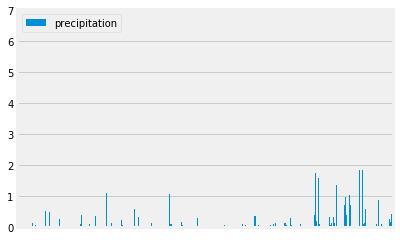

In [16]:
rain_df.plot.bar()
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()

![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [18]:
#Design a query to calculate the total number of stations.


station_results = session.query(func.count(Station.station)).all()
num_of_stations = list(np.ravel(station_results))
num_of_stations

[9]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_results_2 = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
num_of_stations_2 = list(np.ravel(station_results_2))
num_of_stations_2[0]



'USC00519281'

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
top_station = "USC00519281"

top_station_results = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.station ==top_station).all()
temps = list(np.ravel(top_station_results))
temps

['USC00519281', '85.0', '54.0', '71.66378066378067']

In [21]:
# Choose the station with the highest number of temperature observations.
station_results_3 = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
num_of_stations_3 = list(np.ravel(station_results_2))


In [22]:
# Query the last 12 months of temperature observation data for this station
results_2 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > date).filter(Measurement.station == top_station) .all()
last_12_months_top_station= list(np.ravel(results_2))


In [23]:
#and plot the results as a histogram
Temp_df = pd.DataFrame(results_2, columns = ["date", "temperature"])
Temp_df.set_index("date", inplace=True)
Temp_df.head()

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


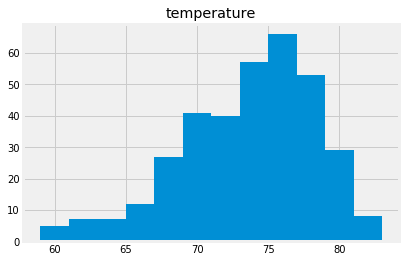

In [24]:
hist = Temp_df.hist(bins=12)


In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps("2017-02-24", "2017-03-05"))

[(61.0, 70.38333333333334, 78.0)]


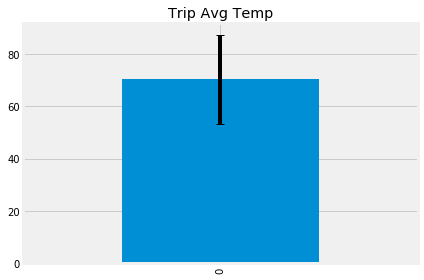

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

results_3 = pd.DataFrame(calc_temps("2017-02-24", "2017-03-05"), columns = ["tmin", "tavg", "tmax"])
errors = results_3["tmax"]-results_3["tmin"]
fig, ax = plt.subplots()
results_3["tavg"].plot.bar(yerr=errors, ax=ax, capsize=4)
plt.title("Trip Avg Temp")
plt.tight_layout()

In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = "2017-02-24"
end_date = "2017-03-05"
results_5 = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation,\
Measurement.tobs).filter(Measurement.station == Station.station).filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date).order_by(Measurement.tobs.desc()).all()

last_year_by_station = list(np.ravel(results_5))
last_year_by_station

['USC00516128',
 'MANOA LYON ARBO 785.2, HI US',
 '21.3331',
 '-157.8025',
 '152.4',
 '78.0',
 'USC00519523',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 '21.33556',
 '-157.71139',
 '19.5',
 '77.0',
 'USC00519523',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 '21.33556',
 '-157.71139',
 '19.5',
 '77.0',
 'USC00519281',
 'WAIHEE 837.5, HI US',
 '21.45167',
 '-157.84888999999998',
 '32.9',
 '77.0',
 'USC00513117',
 'KANEOHE 838.1, HI US',
 '21.4234',
 '-157.8015',
 '14.6',
 '76.0',
 'USC00514830',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 '21.5213',
 '-157.8374',
 '7.0',
 '75.0',
 'USC00519523',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 '21.33556',
 '-157.71139',
 '19.5',
 '75.0',
 'USC00519397',
 'WAIKIKI 717.2, HI US',
 '21.2716',
 '-157.8168',
 '3.0',
 '74.0',
 'USC00519397',
 'WAIKIKI 717.2, HI US',
 '21.2716',
 '-157.8168',
 '3.0',
 '74.0',
 'USC00519523',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 '21.33556',
 '-157.71139',
 '19.5',
 '74.0',
 'USC00519397',
 'WAIKIKI 717.2, HI US',
 '21.2716',

## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [65]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
daily_normals("02-24")
# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

[(61.0, 68.56666666666666, 76.0)]

In [179]:
dates_list = ["02-24", "02-25", "02-26", "02-27", "02-28", "03-01", "03-02", "03-03", "03-04", "03-05"]
results_list =[]
tmin_list = []
tavg_list = []
tmax_list = []

In [180]:

for day in dates_list:
    tmin = session.query(func.min(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) == day).all()
    tmin_list.append(tmin)    
    tavg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) == day).all()
    tavg_list.append(tavg)
    tmax = session.query(func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) == day).all()
    tmax_list.append(tmax)

tmin_r = np.ravel(tmin_list)
tavg_r = np.ravel(tavg_list)
tmax_r = np.ravel(tmax_list)

In [182]:
zippedList =  list(zip(dates_list, tmin_r, tavg_r, tmax_r))

In [183]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(zippedList, columns=["date", "tmin", "tavg", "tmax"])
df.set_index("date", inplace=True)
df


,tmin,tavg,tmax
date,,,
02-24,61.0,68.566667,76.0
02-25,61.0,68.596491,76.0
02-26,62.0,69.892857,78.0
02-27,58.0,69.981481,77.0
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0


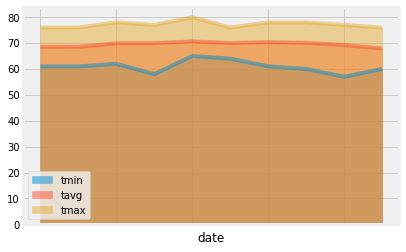

In [186]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot.area(stacked = False)

In [239]:
from flask import Flask, jsonify

In [240]:
precipitation = dict(results)
precipitation

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

In [241]:
app = Flask(__name__)

In [242]:
@app.route("/")
def home():
    print("Server received request for 'Home' page...")
    return "/api/v1.0/precipitation\n"
    "/api/v1.0/stations\n"
    "/api/v1.0/tobs\n"
    "/api/v1.0/tobs\n"
    "/api/v1.0/<start>\n"
    "/api/v1.0/<start>/<end>\n"


In [243]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    print("Server received request for 'precipitation' page...")
    return jsonify(precipitation)

In [244]:
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\Teresa Barajas\Anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
